In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 초기화

In [3]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'Identity',
 'Initializer',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'serialize',
 'zeros']

In [4]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [5]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg', distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

In [6]:
#배치 정규화

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_2 (Dense)              (None, 300)               235200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               30000     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               4

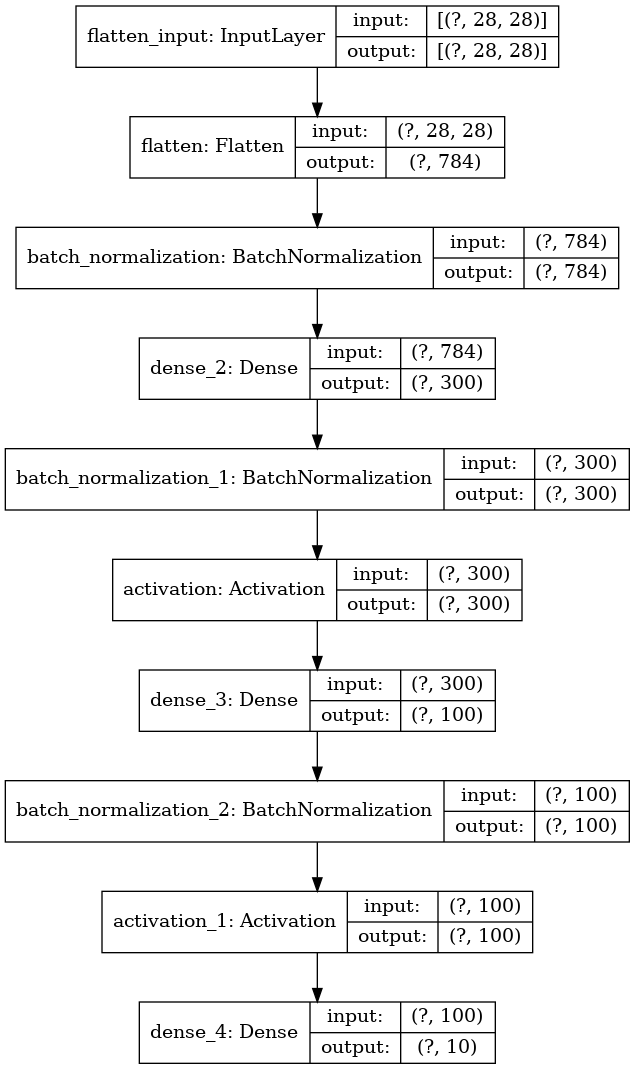

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
model.summary()
keras.utils.plot_model(model, "model.png", show_shapes=True)

In [8]:
# 사전 훈련

In [19]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

print(y_train_A[:10])#y_A는 0번~7번까지 유형의 레이블
print(y_train_B[:10])#y_B는 \\
import pandas as pd
print(pd.Series(y_train).drop_duplicates())
print(pd.Series(y_train_A).drop_duplicates())

[4 0 5 7 7 7 4 4 3 4]
[1. 1. 0. 0. 0. 0. 1. 1. 1. 0.]
0     4
1     0
2     7
3     9
8     3
11    1
12    8
13    6
18    2
30    5
dtype: uint8
0     4
1     0
2     5
3     7
8     3
11    1
12    6
16    2
dtype: uint8


[2021-11-29 01:29:19.855 ip-172-16-7-116:18730 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2021-11-29 01:29:19.888 ip-172-16-7-116:18730 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.
Train on 43986 samples, validate on 4014 samples
Epoch 1/20
43986/43986 [==============================] - 4s 82us/sample - loss: 0.5902 - accuracy: 0.8132 - val_loss: 0.3783 - val_accuracy: 0.8690
Epoch 2/20
43986/43986 [==============================] - 3s 73us/sample - loss: 0.3518 - accuracy: 0.8782 - val_loss: 0.3370 - val_accuracy: 0.8834
Epoch 3/20
43986/43986 [==============================] - 3s 72us/sample - loss: 0.3163 - accuracy: 0.8898 - val_loss: 0.3018 - val_accuracy: 0.8956
Epoch 4/20
43986/43986 [==============================] - 3s 73us/sample - loss: 0.2969 - accuracy: 0.8975 - val_loss: 0.2910 - val_accuracy: 0.9016
Epoch 5/20
43986/43986 [==============================] - 3s 72us/sample - loss: 0

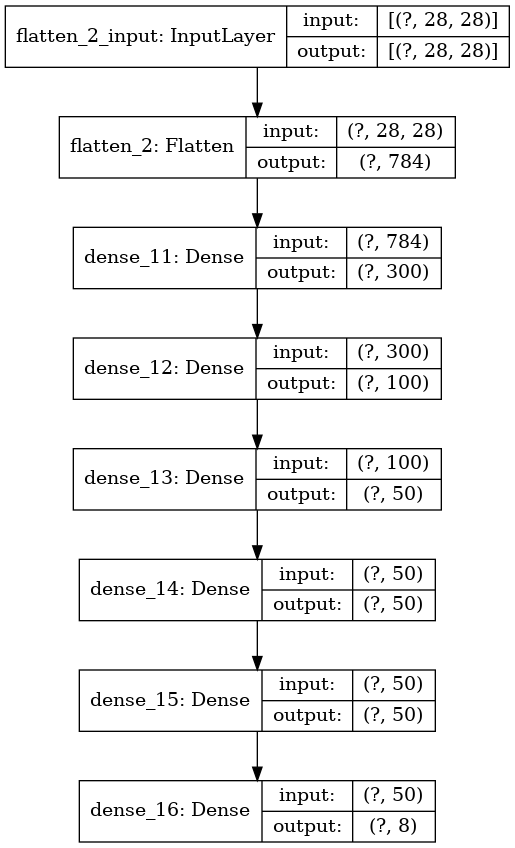

In [11]:
tf.random.set_seed(42)
np.random.seed(42)
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

keras.utils.plot_model(model_A, "model.png", show_shapes=True)

In [13]:
model_A.save("my_model_A.h5")

Train on 200 samples, validate on 986 samples
Epoch 1/20
200/200 [==============================] - 1s 3ms/sample - loss: 0.9509 - accuracy: 0.4800 - val_loss: 0.6533 - val_accuracy: 0.5568
Epoch 2/20
200/200 [==============================] - 0s 346us/sample - loss: 0.5837 - accuracy: 0.7100 - val_loss: 0.4825 - val_accuracy: 0.8479
Epoch 3/20
200/200 [==============================] - 0s 330us/sample - loss: 0.4527 - accuracy: 0.8750 - val_loss: 0.4097 - val_accuracy: 0.8945
Epoch 4/20
200/200 [==============================] - 0s 337us/sample - loss: 0.3869 - accuracy: 0.9050 - val_loss: 0.3630 - val_accuracy: 0.9209
Epoch 5/20
200/200 [==============================] - 0s 359us/sample - loss: 0.3404 - accuracy: 0.9300 - val_loss: 0.3302 - val_accuracy: 0.9280
Epoch 6/20
200/200 [==============================] - 0s 358us/sample - loss: 0.3073 - accuracy: 0.9350 - val_loss: 0.3026 - val_accuracy: 0.9381
Epoch 7/20
200/200 [==============================] - 0s 331us/sample - loss: 0.

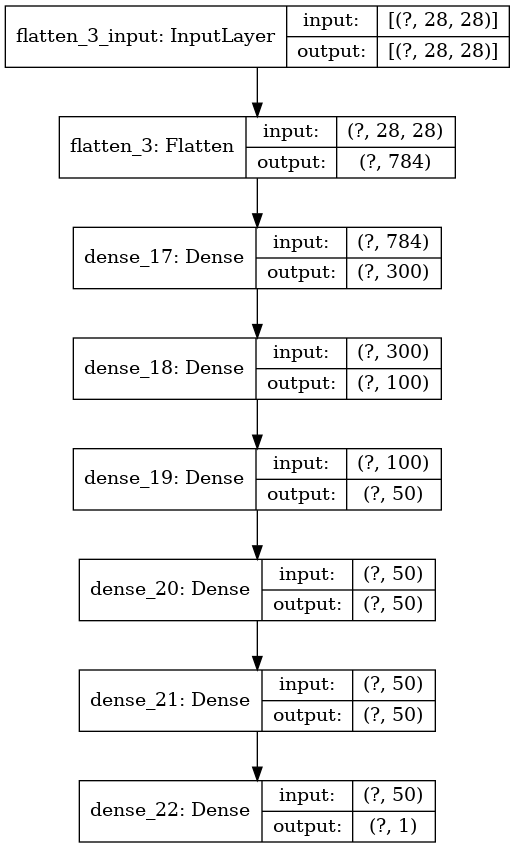

In [12]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))
keras.utils.plot_model(model_B, "model.png", show_shapes=True)


In [20]:
model_A = keras.models.load_model("my_model_A.h5")

#서로 영향받는 레이어를 공유하는 방식
# model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
# model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

#서로 영향받지 않게 레이어를 복사해서 공유하는 방식
model_A_clone = keras.models.clone_model(model_A)#모델복사 keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())#가중치복사 .set_weights(model_A.get_weights()) 
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])#레이어 공유
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))#마지막 레이어 설정

#처음n번의 epoch동안 재사용된 레이어의 학습 상태를 동결한다.--> 4ephoch동안 훈련
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

#동결된 레이어의 학습 상태를 풀고, 남은 16epoch동안 훈련한다. 
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/4
200/200 [==============================] - 1s 3ms/sample - loss: 0.4212 - accuracy: 0.8500 - val_loss: 0.4222 - val_accuracy: 0.8215
Epoch 2/4
200/200 [==============================] - 0s 331us/sample - loss: 0.3933 - accuracy: 0.8550 - val_loss: 0.3965 - val_accuracy: 0.8337
Epoch 3/4
200/200 [==============================] - 0s 334us/sample - loss: 0.3680 - accuracy: 0.8650 - val_loss: 0.3733 - val_accuracy: 0.8458
Epoch 4/4
200/200 [==============================] - 0s 315us/sample - loss: 0.3453 - accuracy: 0.8750 - val_loss: 0.3524 - val_accuracy: 0.8682
Train on 200 samples, validate on 986 samples
Epoch 1/16
200/200 [==============================] - 1s 3ms/sample - loss: 0.2790 - accuracy: 0.9250 - val_loss: 0.2402 - val_accuracy: 0.9584
Epoch 2/16
200/200 [==============================] - 0s 341us/sample - loss: 0.1976 - accuracy: 0.9850 - val_loss: 0.1908 - val_accuracy: 0.9807
Epoch 3/16
200/200 [====================

In [21]:
print('transfer하지 않은 모델')
model_B.evaluate(X_test_B, y_test_B)
print('transfer한 모델')
model_B_on_A.evaluate(X_test_B, y_test_B)

transfer하지 않은 모델
2000/2000 [==============================] - 0s 40us/sample - loss: 0.1426 - accuracy: 0.9695
transfer한 모델
2000/2000 [==============================] - 0s 41us/sample - loss: 0.0629 - accuracy: 0.9980


[0.06290647694468499, 0.998]

In [ ]:
# 각종 optimizer

In [22]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)